In [1]:
import pyart
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
#file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira.nc'
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira_ec09dc9c.nc'
dayFile = nc.Dataset(file_path)

dbz = np.array(dayFile.variables['Zh'])
dbz[dbz > 1000] = np.nan
z = 10 ** (dbz / 10)
height = np.array(dayFile.variables['height'])
time = np.array(dayFile.variables['time'])

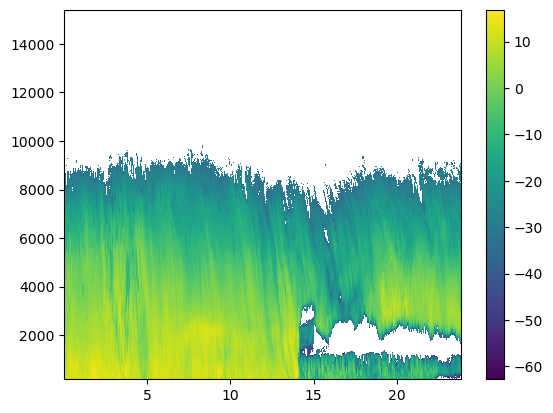

In [3]:
T, H = np.meshgrid(time, height)
plt.pcolormesh(time, height, dbz.T, shading='auto')
plt.colorbar()
#plt.ylim(top=500)

In [4]:
# Empirical constants from Makrosov et al. (2022), Souverijns et al. (2017)
a = 18
b = 1.1

precip = (z / a) ** (1 / b)


T, H = np.meshgrid(time, height)

Text(0.5, 1.0, 'Radar reflectivity precipitation')

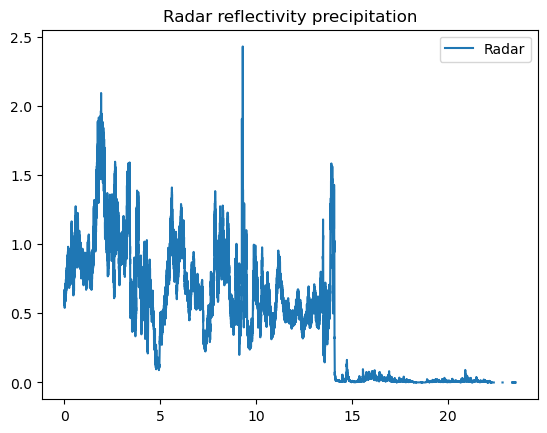

In [5]:
plt.plot(time, precip[:, 0], label='Radar')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [6]:
disfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/disdrometer/20230426_neumayer_parsivel_0bc7d487.nc'
disdayFile = nc.Dataset(disfile_path)

In [7]:
rainRate = np.array(disdayFile.variables['rainfall_rate']) * 1000 * 60 * 60 # time units
snowRate = (rainRate ** 1.9) * 0.03344 # Matrosov et al (2022) mass size relation
disTime = np.array(disdayFile.variables['time'])


Text(0.5, 1.0, 'Radar reflectivity precipitation')

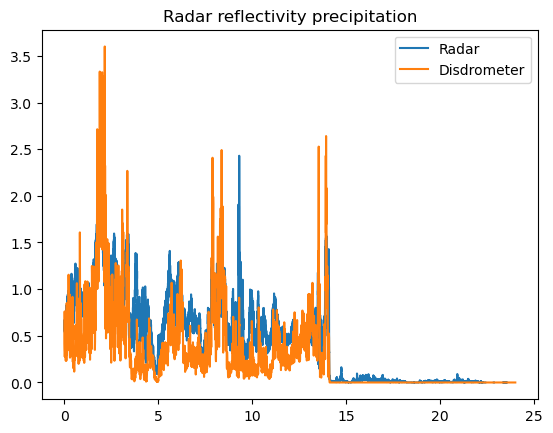

In [8]:
plt.plot(time, precip[:, 0], label='Radar')
plt.plot(disTime, snowRate, label='Disdrometer')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [9]:
#file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230426_neumayer_mira.nc'
modfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/era_precip/a5fe22a8557d37e66a32d5412c5f2411.nc'
model = nc.Dataset(modfile_path)

# Coords of Neumayer III
minMod = np.array(model.variables['mntpr'][:, 23, 87]) * 60 * 60
maxMod = np.array(model.variables['mxtpr'][:, 23, 87]) * 60 * 60

print(model)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-06-09T10:33 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "tmp7xxvkl77/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["max"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(8760), latitude(41), longitude(241)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 mxtpr(valid_time, latitude, longitude), float32 mntpr(valid_time, latitude, longitude)
    groups: 


Text(0.5, 1.0, 'Radar reflectivity precipitation')

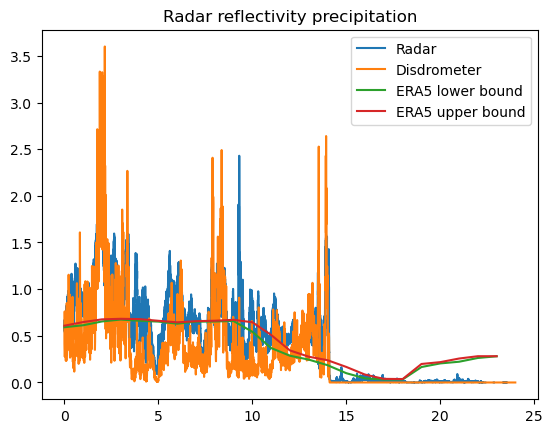

In [10]:
# April 26th is the 116th day of the year
subsetMinMod = minMod[115*24:116*24]
subsetMaxMod = maxMod[115*24:116*24]

plt.plot(time, precip[:, 0], label='Radar')
plt.plot(disTime, snowRate, label='Disdrometer')
plt.plot(np.arange(0, 24, 1), subsetMinMod, label='ERA5 lower bound')
plt.plot(np.arange(0, 24, 1), subsetMaxMod, label='ERA5 upper bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [11]:
snowRateSmooth = gaussian_filter1d(snowRate, sigma=100)
radarSmooth = gaussian_filter1d(precip[:, 0][~np.isnan(precip[:, 0])], sigma=900)
timeSmooth = time[~np.isnan(precip[:, 0])]


Text(0.5, 1.0, 'Radar reflectivity precipitation')

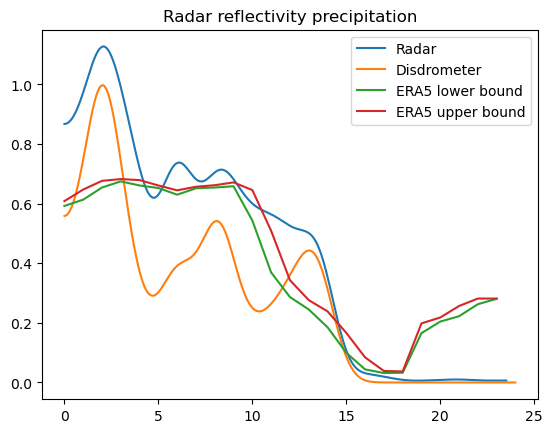

In [12]:
# April 26th is the 116th day of the year
subsetMinMod = minMod[115*24:116*24]
subsetMaxMod = maxMod[115*24:116*24]

plt.plot(timeSmooth, radarSmooth, label='Radar')
plt.plot(disTime, snowRateSmooth, label='Disdrometer')
plt.plot(np.arange(0, 24, 1), subsetMinMod, label='ERA5 lower bound')
plt.plot(np.arange(0, 24, 1), subsetMaxMod, label='ERA5 upper bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [13]:
radarAccum = np.trapz(precip[:, 0][~np.isnan(precip[:, 0])], dx=24/26266)
disdAccum = np.trapz(snowRate, dx=24/2879)
eraUpperAccum = np.trapz(subsetMaxMod)
eraLowerAccum = np.trapz(subsetMinMod)
radarSmoothAccum = np.trapz(radarSmooth, dx=24/26266)
snowSmoothAccum = np.trapz(snowRateSmooth, dx=24/2879)

print(radarAccum)
print(disdAccum)
print(eraUpperAccum)
print(eraLowerAccum)
print(radarSmoothAccum)
print(snowSmoothAccum)

11.13015
6.952413
9.71818
8.977461
11.1300335
6.951273
